## 20143692_Kangkyeungseok
## Machine Learning Assignment 07
## Apply K-means algorithm to both image value and its spatial domain


In [119]:
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt

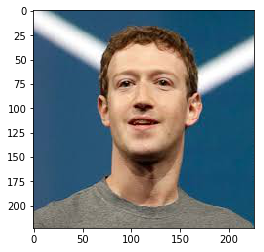

In [120]:
#Read file
image_data = Image.open('Zuckerberg.jpg')
cluster_Data = np.array(image_data)
size_col = len(cluster_Data[0])  # height
size_row = len(cluster_Data)  # width
data=np.zeros((size_row,size_col, 3),dtype=float)
for i in range(size_row):
    for j in range(size_col):
        data[i][j] = cluster_Data[i][j] 

plt.imshow(cluster_Data)
plt.show()

In [121]:
#clustering function
def clustering(k,a, list_label, list_centroids_rgb, list_centroids_domain):
    checkUpdate=0
    energysum=0

    for i in range(size_row):
        for j in range(size_col):
            label = list_label[i][j]
            smallest_distance = distance(list_centroids_rgb[label, :], data[i][j])+a*distance(list_centroids_domain[label,:],data2[i][j])
           
            energysum += smallest_distance
            for m in range(k):
                if m == label:
                    continue
                ckdistance= distance(list_centroids_rgb[m, :], data[i][j])+a*distance(list_centroids_domain[m,:],data2[i][j])
                if(smallest_distance > ckdistance):
                    list_label[i][j]=m
                    smallest_distance=ckdistance
                    checkUpdate+=1
    return list_label, checkUpdate, energysum

#calculate centroids function
def calculate_centroids(list_label, list_centroids_rgb, list_centroids_domain,list_count):
    for i in range(size_row):
        for j in range(size_col):
            label = list_label[i][j]
            list_centroids_rgb[label, :] += data[i][j]
            list_centroids_domain[label, :]+=data2[i][j]
            list_count[label] += 1
    for i in range(0,k):
        list_centroids_rgb[i, :] = list_centroids_rgb[i,:]/list_count[i]
        list_centroids_domain[i, :] =list_centroids_domain[i,:]/list_count[i]
    return list_label,list_centroids_rgb, list_centroids_domain,list_count

#Linear scaling
data2 = np.zeros((size_row, size_col), dtype=list)
for i in range(size_row):
    for j in range(size_col):
        data2[i][j]=np.array([i/(size_row-1),j/(size_col-1)])

#Whitening image
mean = np.zeros((1,3), dtype = float)
std = np.zeros((1,3), dtype = float)

for i in range(size_row):
    for j in range(size_col):
        mean += data[i][j]
mean=mean/(size_col*size_row)

for i in range(size_row):
    for j in range(size_col):
        std += ((data[i][j]-mean)**2)
std = np.sqrt(std/(size_col*size_row))

for i in range(size_row):
    for j in range(size_col):
        data[i][j]=abs((data[i][j]-mean)/std)

#data = whitened(rgb) , data2 = scaled(domain)
#calculate distance function
def distance(x, y):
    dis = np.sum((x - y) ** 2)
    return (dis)


#init random label
def init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label):
    for i in range(size_row):
        for j in range(size_col):
            label = random.randint(0, k - 1)
            list_label[i][j] = label
            list_centroids_rgb[label, :] += data[i][j]
            list_centroids_domain[label ,:]+= data2[i][j]
            list_count[label] += 1
    return list_centroids_rgb,list_centroids_domain, list_count, list_label

#calculate init_centroid
def init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count):
    for i in range(0, k):
        list_centroids_rgb[i, :] = list_centroids_rgb[i,:]/list_count[i]
        list_centroids_domain[i, :] =list_centroids_domain[i,:]/list_count[i]
    return list_centroids_rgb, list_centroids_domain



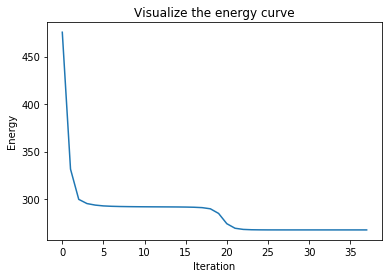

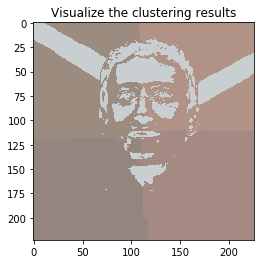

In [124]:
k = 5
a=20
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)

    
# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()

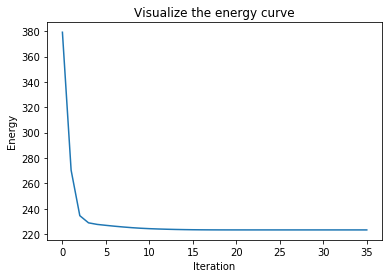

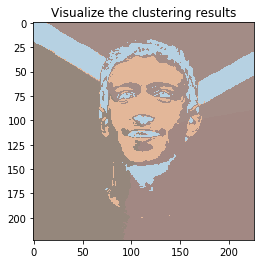

In [125]:
k = 5
a= 10
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)

    
# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()

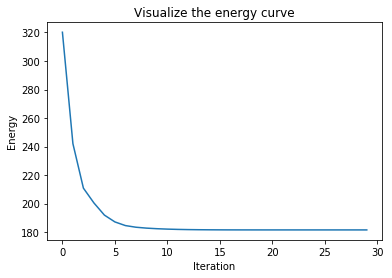

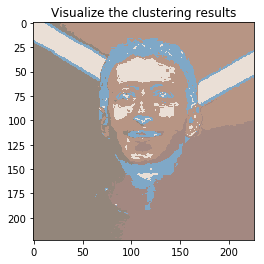

In [126]:
k = 5
a= 5
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)



# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()

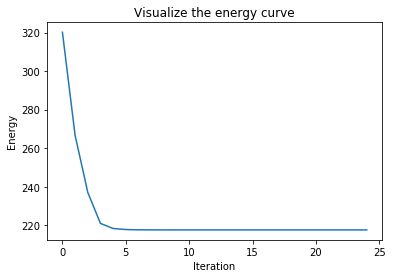

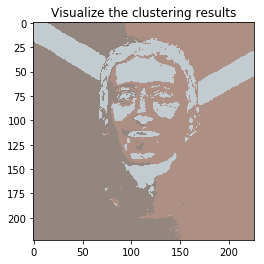

In [135]:
k = 3
a= 5
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)



# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()

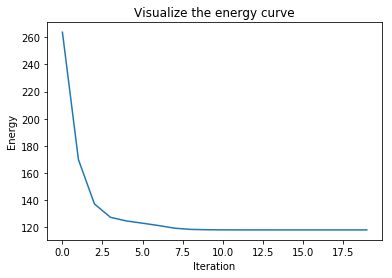

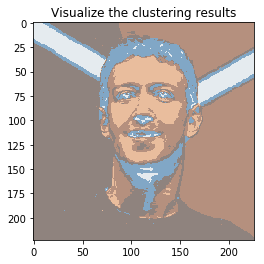

In [127]:
k = 5
a= 1
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)



# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()

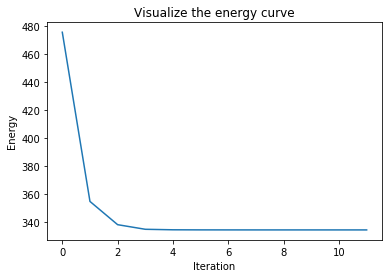

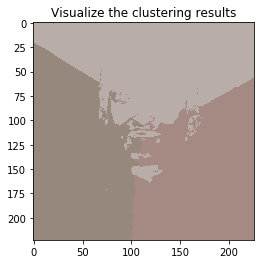

In [130]:
k = 3
a= 20
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)



# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()

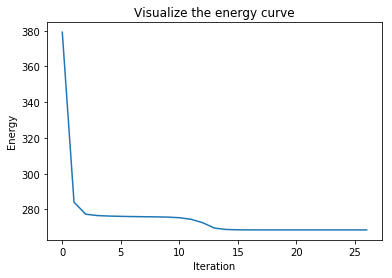

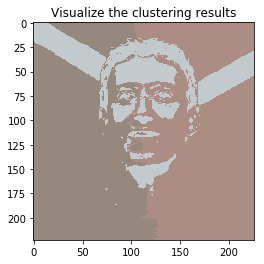

In [131]:
k = 3
a= 10
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)



# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()

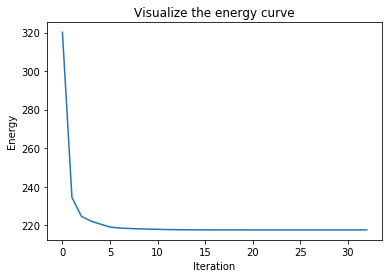

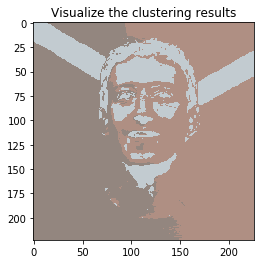

In [133]:
k = 3
a= 5
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)



# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()

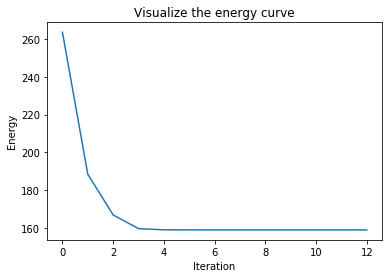

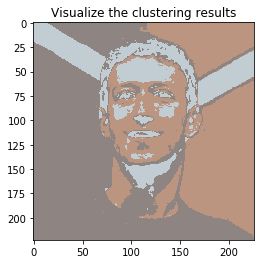

In [134]:
k = 3
a= 1
Energy = []
list_centroids_rgb = np.zeros((k, 3), dtype=float)
list_centroids_domain = np.zeros((k,2),dtype=float)
list_count = np.zeros(k)
list_label = np.empty((size_row, size_col), dtype=int)
list_centroids_rgb, list_centroids_domain, list_count, list_label = init_label(k, list_centroids_rgb,list_centroids_domain, list_count, list_label)
list_centroids_rgb,list_centroids_domain = init_centroid(k, list_centroids_rgb,list_centroids_domain, list_count)

while True:
    list_label,check, energy =clustering(k,a, list_label, list_centroids_rgb,list_centroids_domain)
   
    Energy.append(np.sqrt(energy)/size_col*size_row)
    if (check==0):
        break
    list_centroids_rgb = np.zeros((k, 3), dtype=float)
    list_centroids_domain=np.zeros((k,2),dtype=float)
    list_count = np.zeros(k)
    list_label,list_centroids_rgb,list_centroids_domain,list_count = calculate_centroids(list_label, list_centroids_rgb,list_centroids_domain, list_count)



# show image
x = np.arange(0, len(Energy), 1)
plt.plot(x, Energy)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Visualize the energy curve')
plt.show()


count = 0
for i in range(size_row):
    for j in range(size_col):
        label = list_label[i][j]
        cluster_Data[i][j] = (list_centroids_rgb[label, :]*std)+mean
        count += 1
final_data=np.zeros((size_row,size_col,3), dtype=np.uint8)
for i in range(size_row):
    for j in range(size_col):
        final_data[i][j]=cluster_Data[i][j]
plt.imshow(final_data)
plt.title('Visualize the clustering results')
plt.show()